We are working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. We have been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but we will need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so we decided to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

We created two datasets containing the results of every official men's and women's international football match since the 19th century, which we scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question we are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [10]:
# Start your code here!
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin
from scipy.stats import mannwhitneyu

# Load men's and women's datasets
men = pd.read_csv("men_results.csv")
women = pd.read_csv("women_results.csv")

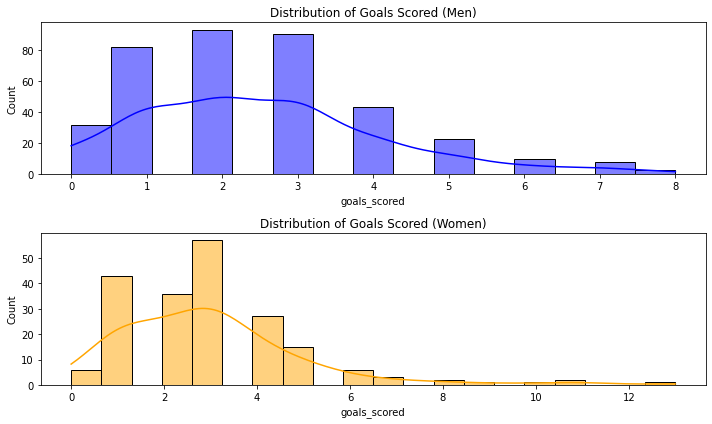

<Figure size 432x288 with 0 Axes>

In [13]:
# Filter the data for the time range and tournament
men["date"] = pd.to_datetime(men["date"])
women["date"] = pd.to_datetime(women["date"])

men_subset = men.loc[(men["date"] > "2002-01-01") & (men["tournament"].isin(["FIFA World Cup"])), :].copy()
women_subset = women.loc[(women["date"] > "2002-01-01") & (women["tournament"].isin(["FIFA World Cup"])), :].copy()

# Create group and goals_scored columns using .loc
men_subset.loc[:, "group"] = "Men"
women_subset.loc[:, "group"] = "Women"
men_subset.loc[:, "goals_scored"] = men_subset["home_score"] + men_subset["away_score"]
women_subset.loc[:, "goals_scored"] = women_subset["home_score"] + women_subset["away_score"]

# Determine normality using histograms
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
sns.histplot(data=men_subset, x="goals_scored", kde=True, color='blue')
plt.title('Distribution of Goals Scored (Men)')

plt.subplot(2, 1, 2)
sns.histplot(data=women_subset, x="goals_scored", kde=True, color='orange')
plt.title('Distribution of Goals Scored (Women)')

plt.tight_layout()
plt.show()
plt.clf()


In [15]:
# Combine women's and men's data and calculate goals scored in each match
both = pd.concat([women_subset, men_subset], axis=0, ignore_index=True)

# Transform the data for the pingouin Mann-Whitney U test/Wilcoxon-Mann-Whitney test
both_subset = both[["goals_scored", "group"]]
both_subset_wide = both_subset.pivot(columns="group", values="goals_scored")

# Check column names in both_subset_wide
print(both_subset_wide.columns)

# Perform right-tailed Wilcoxon-Mann-Whitney test with pingouin
results_pg = pingouin.mwu(x=both_subset_wide["Women"],  # Check the correct column name
                          y=both_subset_wide["Men"],    # Check the correct column name
                          alternative="greater")

# Alternative SciPy solution: Perform right-tailed Wilcoxon-Mann-Whitney test with scipy
results_scipy = mannwhitneyu(x=women_subset["goals_scored"],
                             y=men_subset["goals_scored"],
                             alternative="greater")

# Extract p-value as a float
p_val = results_pg["p-val"].values[0]

# Determine hypothesis test result using significance level
alpha = 0.01
result = "reject" if p_val <= alpha else "fail to reject"

result_dict = {"p_val": p_val, "result": result}

# Display the result dictionary
print(result_dict)

Index(['Men', 'Women'], dtype='object', name='group')
{'p_val': 0.005106609825443641, 'result': 'reject'}
